# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and comprises personnel representing the total US Army force including the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of the 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and have many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database includes a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---


#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Imported Libraries*
    
    *ii. Ingested Data *
    
    *iii. Explored Data*
    
    *iv. Outlier Detection*
    
    *v.  Dropped unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separeted the data frame for evaluation purposes

#### 3. Multi-class Classification
- Imported libraries
- Implemented SVM Classifer
- Implemented Decision Tree Classifier
- Implemented Random Forest Classifer
- Implemented XGBoost Classifer
- Compared The Models



# EDA
- Droped unnecessary colums
- Droped DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries

*Note: Other libraries were also imported as needed.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_f = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="utf-8")

In [3]:
df_f.head(10)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand
5,10053,272,1428,326,228,1326,229,201,356,342,...,Combat Service Support,88M,Germany,2,NaN,2,44,67,180,Left hand
6,10061,261,1352,306,223,1246,232,172,358,320,...,Combat Service Support,35F,New Mexico,1,NaN,1,21,65,165,Right hand
7,10070,229,1383,327,205,1281,234,194,365,337,...,Combat Service Support,92Y,American Samoa,6,Polynesian Samoan,6,23,66,168,Right hand
8,10077,213,1237,308,193,1135,208,175,355,283,...,Combat Service Support,92F,Virginia,2,NaN,2,24,59,118,Left hand
9,10080,281,1301,278,208,1194,221,178,323,290,...,Combat Service Support,31B,South Korea,1,NaN,1,37,63,150,Right hand


In [4]:
df_f.tail(10)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
1976,29494,251,1303,314,204,1193,227,173,357,294,...,Combat Service Support,35D,California,3,Mexican,3,41,62,141,Right hand
1977,29495,236,1298,280,211,1194,222,172,360,336,...,Combat Support,56M,Texas,1,NaN,1,30,64,140,Right hand
1978,29496,196,1250,285,177,1169,206,163,343,263,...,Combat Service Support,92Y,Indiana,1,NaN,1,30,61,105,Right hand
1979,29497,201,1297,310,213,1203,204,181,360,268,...,Combat Support,90A,New York,1,NaN,1,32,63,124,Left hand
1980,29498,238,1414,336,207,1304,218,183,385,305,...,Combat Service Support,35D,Texas,3,Mexican,3,25,68,166,Right hand
1981,29501,285,1392,335,223,1297,252,196,368,299,...,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
1982,29502,262,1324,301,202,1204,236,181,378,294,...,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
1983,29503,260,1334,318,213,1259,234,183,363,332,...,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
1984,29511,205,1293,302,199,1207,213,163,376,276,...,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand
1985,920103,238,1346,308,210,1256,236,188,361,285,...,Combat Support,92F,Texas,3,Mexican,3,27,66,132,Right hand


In [5]:
df_m = pd.read_csv("ANSUR II MALE Public.csv", encoding="latin-1") 
# 'utf-8' codec can't decode

In [6]:
df_m.head(10)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
5,10115,263,1407,344,216,1293,228,184,404,340,...,Combat Service Support,91L,Kentucky,1,NaN,1,39,69,175,Right hand
6,10117,314,1476,343,257,1378,280,207,453,452,...,Combat Service Support,91D,Mississippi,2,NaN,2,32,72,250,Right hand
7,10237,304,1529,360,254,1402,247,206,425,332,...,Combat Service Support,88M,Romania,1,NaN,1,23,74,211,Right hand
8,10242,321,1457,339,230,1345,257,198,415,379,...,Combat Service Support,92F,Arkansas,1,NaN,1,36,70,220,Right hand
9,10244,227,1481,345,233,1372,264,204,406,325,...,Combat Support,25L,Maryland,1,NaN,1,23,72,160,Left hand


In [7]:
df_m.tail(10)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
4072,29434,210,1377,342,226,1283,254,200,398,345,...,Combat Arms,11B,New York,1,NaN,1,22,67,160,Right hand
4073,29437,224,1386,331,233,1265,245,195,401,426,...,Combat Arms,11B,Texas,1,NaN,1,28,69,185,Right hand
4074,29439,208,1500,347,228,1398,265,217,424,312,...,Combat Support,68W,New York,1,NaN,1,25,74,170,Right hand
4075,29440,295,1434,321,217,1345,252,204,409,344,...,Combat Arms,13B,California,1,NaN,1,25,70,190,Right hand
4076,29441,240,1458,343,231,1344,243,205,394,342,...,Combat Arms,13R,California,1,NaN,1,21,73,197,Right hand
4077,29442,235,1353,312,216,1263,228,193,384,318,...,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
4078,29443,247,1473,336,234,1346,253,196,428,374,...,Combat Arms,91B,Oklahoma,1,NaN,1,22,71,194,Right hand
4079,29447,264,1394,313,227,1280,245,193,407,367,...,Combat Arms,13B,Oklahoma,1,NaN,1,23,67,186,Right hand
4080,29451,203,1417,327,223,1314,250,196,419,365,...,Combat Arms,13P,Oklahoma,1,NaN,1,22,69,165,Right hand
4081,29452,327,1523,358,226,1408,269,225,442,379,...,Combat Arms,92Y,Oklahoma,1,NaN,1,38,73,218,Right hand


## Explore Data

In [8]:
df_f.shape

(1986, 108)

In [9]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [10]:
df_f.describe()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,...,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000
mean,22306.606,229.651,1335.095,311.198,215.740,1239.030,228.110,182.051,365.349,305.579,...,355.136,980.149,677.582,154.793,794.190,35.072,1.781,28.944,64.602,147.505
std,20904.730,31.465,58.080,17.165,14.892,55.802,11.771,9.642,18.299,30.757,...,23.945,50.023,109.846,7.828,38.195,955.583,1.000,8.332,2.802,22.855
min,10037.000,155.000,1115.000,249.000,170.000,1038.000,194.000,151.000,283.000,216.000,...,289.000,805.000,358.000,124.000,672.000,1.000,1.000,17.000,56.000,86.000
25%,17667.000,207.000,1298.000,300.000,205.000,1202.000,220.000,175.000,353.000,285.000,...,338.000,947.000,601.000,150.000,769.000,1.000,1.000,22.000,63.000,130.000
50%,22096.500,227.000,1332.000,311.000,215.000,1236.000,227.000,182.000,365.000,304.000,...,355.000,977.500,668.000,154.000,794.000,2.000,2.000,27.000,64.000,145.000
75%,26089.750,249.000,1374.000,323.000,225.000,1277.000,236.000,188.000,378.000,324.000,...,370.000,1013.000,745.750,160.000,819.000,3.000,2.000,34.000,66.000,161.000
max,920103.000,358.000,1536.000,371.000,275.000,1419.000,270.000,216.000,422.000,435.000,...,432.000,1142.000,1196.000,183.000,941.000,42351.000,6.000,58.000,80.000,270.000


In [11]:
df_f.isnull().sum().any()

True

In [12]:
df_m.shape

(4082, 108)

In [13]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [14]:
df_m.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,...,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000
mean,20003.371,254.651,1440.737,335.244,229.344,1329.082,252.017,200.935,415.676,358.136,...,387.643,1056.485,855.240,175.917,847.512,8.974,1.534,30.159,70.036,188.005
std,6568.435,37.327,63.287,17.483,14.649,59.516,12.936,10.471,19.162,34.618,...,29.349,52.155,142.207,8.955,41.656,83.013,0.959,8.810,2.947,29.942
min,10027.000,163.000,1194.000,270.000,156.000,1106.000,186.000,156.000,337.000,246.000,...,293.000,876.000,393.000,141.000,695.000,1.000,1.000,17.000,60.000,0.000
25%,14270.250,227.000,1398.000,324.000,219.250,1289.000,243.000,194.000,403.000,335.000,...,367.000,1020.000,756.000,170.000,819.000,1.000,1.000,23.000,68.000,168.000
50%,17236.500,251.000,1439.000,335.000,228.000,1328.000,252.000,201.000,415.000,357.000,...,386.000,1055.000,846.000,176.000,847.000,1.000,1.000,28.000,70.000,185.000
75%,27315.750,279.000,1481.000,346.000,239.000,1367.000,261.000,208.000,428.000,380.000,...,407.000,1090.000,944.000,182.000,875.000,2.000,2.000,36.000,72.000,207.000
max,29452.000,451.000,1683.000,393.000,293.000,1553.000,306.000,245.000,489.000,490.000,...,494.000,1245.000,1442.000,216.000,1009.000,4251.000,8.000,58.000,94.000,321.000


In [15]:
df_f.isnull().sum().any()

True

In [16]:
df_m.Gender.value_counts(dropna=False)

Male    4082
Name: Gender, dtype: int64

In [17]:
df_f.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [18]:
df_m.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [19]:
df_m.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [20]:
df_m.columns.difference(df_f.columns)  

Index(['subjectid'], dtype='object')

In [21]:
df_f.columns.difference(df_m.columns)

Index(['SubjectId'], dtype='object')

In [22]:
df_m.rename(columns={"Subjectid":"SubjectId"}, inplace=True)

In [23]:
df_f.columns.equals(df_m.columns)

False

In [24]:
data = pd.concat([df_f,df_m], axis=0, ignore_index=True)

In [25]:
data.head(10)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.000,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.000,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.000,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.000,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.000,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN
5,10053.000,272,1428,326,228,1326,229,201,356,342,...,88M,Germany,2,NaN,2,44,67,180,Left hand,NaN
6,10061.000,261,1352,306,223,1246,232,172,358,320,...,35F,New Mexico,1,NaN,1,21,65,165,Right hand,NaN
7,10070.000,229,1383,327,205,1281,234,194,365,337,...,92Y,American Samoa,6,Polynesian Samoan,6,23,66,168,Right hand,NaN
8,10077.000,213,1237,308,193,1135,208,175,355,283,...,92F,Virginia,2,NaN,2,24,59,118,Left hand,NaN
9,10080.000,281,1301,278,208,1194,221,178,323,290,...,31B,South Korea,1,NaN,1,37,63,150,Right hand,NaN


In [26]:
data.Gender.value_counts(dropna=False)

Male      4082
Female    1986
Name: Gender, dtype: int64

In [27]:
data.tail(10)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
6058,NaN,210,1377,342,226,1283,254,200,398,345,...,11B,New York,1,NaN,1,22,67,160,Right hand,29434.000
6059,NaN,224,1386,331,233,1265,245,195,401,426,...,11B,Texas,1,NaN,1,28,69,185,Right hand,29437.000
6060,NaN,208,1500,347,228,1398,265,217,424,312,...,68W,New York,1,NaN,1,25,74,170,Right hand,29439.000
6061,NaN,295,1434,321,217,1345,252,204,409,344,...,13B,California,1,NaN,1,25,70,190,Right hand,29440.000
6062,NaN,240,1458,343,231,1344,243,205,394,342,...,13R,California,1,NaN,1,21,73,197,Right hand,29441.000
6063,NaN,235,1353,312,216,1263,228,193,384,318,...,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand,29442.000
6064,NaN,247,1473,336,234,1346,253,196,428,374,...,91B,Oklahoma,1,NaN,1,22,71,194,Right hand,29443.000
6065,NaN,264,1394,313,227,1280,245,193,407,367,...,13B,Oklahoma,1,NaN,1,23,67,186,Right hand,29447.000
6066,NaN,203,1417,327,223,1314,250,196,419,365,...,13P,Oklahoma,1,NaN,1,22,69,165,Right hand,29451.000
6067,NaN,327,1523,358,226,1408,269,225,442,379,...,92Y,Oklahoma,1,NaN,1,38,73,218,Right hand,29452.000


In [28]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    SubjectId                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [29]:
data.duplicated().sum()

0

In [30]:
data.DODRace.value_counts(dropna=False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [31]:
will_drop = []

for col in data:
    if(data[col].isnull().sum()>(data.shape[0]//3)):
        will_drop.append(col)
will_drop       

['SubjectId', 'Ethnicity']

In [32]:
data.drop(will_drop, axis=1, inplace=True)

In [33]:
data.isnull().sum().any()

True

In [34]:
data.shape

(6068, 107)

In [35]:
# how many unique values object features have

for col in data.select_dtypes("object"):
    print(f"{col} has {data[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [36]:
data.DODRace.unique()

array([2, 3, 1, 6, 4, 5, 8], dtype=int64)

In [37]:
data.SubjectNumericRace.value_counts(dropna=False)

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
62          8
35          8
64          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
641         2
431         2
423         2
2518        2
451         2
2351        2
318         2
425         1
238         1
358         1
48          1
42351       1
428         1
631         1
4251        1
Name: SubjectNumericRace, dtype: int64

In [38]:
data.drop("SubjectNumericRace", axis=1, inplace=True)

In [39]:
data.DODRace.value_counts(dropna=False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [40]:
data["DODRace"] = data.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [41]:
data.DODRace.value_counts(dropna=False)

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

<AxesSubplot:ylabel='Component,DODRace'>

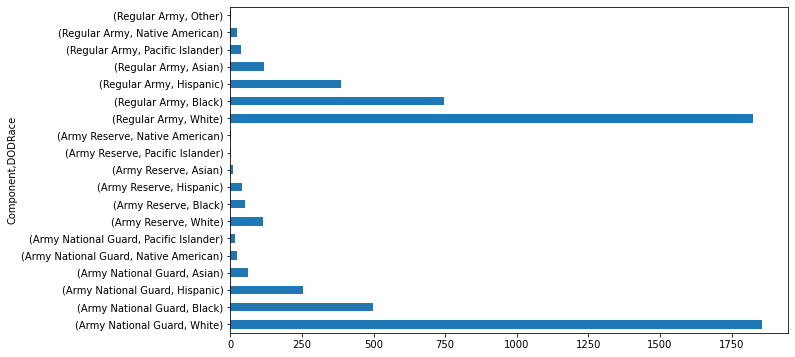

In [42]:
data.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh")

In [43]:
data.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White              0.772
                                             Black              0.098
                                             Hispanic           0.092
                                             Asian              0.022
                                             Native American    0.011
                                             Pacific Islander   0.005
                     Combat Service Support  White              0.644
                                             Black              0.219
                                             Hispanic           0.100
                                             Asian              0.023
                                             Pacific Islander   0.008
                                             Native American    0.007
                     Combat Support          White              0.662
                            

In [44]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 106 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    abdominalextensiondepthsitting  int64  
 1    acromialheight                  int64  
 2    acromionradialelength           int64  
 3    anklecircumference              int64  
 4    axillaheight                    int64  
 5    balloffootcircumference         int64  
 6    balloffootlength                int64  
 7    biacromialbreadth               int64  
 8    bicepscircumferenceflexed       int64  
 9    bicristalbreadth                int64  
 10   bideltoidbreadth                int64  
 11   bimalleolarbreadth              int64  
 12   bitragionchinarc                int64  
 13   bitragionsubmandibulararc       int64  
 14   bizygomaticbreadth              int64  
 15   buttockcircumference            int64  
 16   buttockdepth                    int64  
 17   buttockheigh

In [45]:
drop_list1 = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin"   
]

data.drop(drop_list1, axis=1, inplace=True)

In [46]:
# selected only White, Black, Hispanic

data = data[(data["DODRace"] == "White") | (data["DODRace"] == "Black") |
                (data["DODRace"] == "Hispanic")]
data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference,subjectid
0,231,1282,301,204,1180,222,177,373,315,263,...,942,657,152,756,Female,Germany,Black,26,Right hand,NaN
1,194,1379,320,207,1292,225,178,372,272,250,...,1032,534,155,815,Female,California,Hispanic,21,Right hand,NaN
2,183,1369,329,233,1271,237,196,397,300,276,...,1035,663,162,799,Female,Texas,White,23,Right hand,NaN
3,261,1356,306,214,1250,240,188,384,364,276,...,999,782,173,818,Female,District of Columbia,Black,22,Right hand,NaN
4,309,1303,308,214,1210,217,182,378,320,336,...,911,886,152,762,Female,Texas,White,45,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,235,1353,312,216,1263,228,193,384,318,241,...,1016,675,163,778,Male,Colorado,White,22,Right hand,29442.000
6064,247,1473,336,234,1346,253,196,428,374,284,...,1082,896,178,873,Male,Oklahoma,White,22,Right hand,29443.000
6065,264,1394,313,227,1280,245,193,407,367,271,...,1011,832,178,822,Male,Oklahoma,White,23,Right hand,29447.000
6066,203,1417,327,223,1314,250,196,419,365,271,...,1062,731,172,837,Male,Oklahoma,White,22,Right hand,29451.000


In [47]:
data.reset_index(drop=True, inplace=True)

In [48]:
data.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference,subjectid
0,231,1282,301,204,1180,222,177,373,315,263,...,942,657,152,756,Female,Germany,Black,26,Right hand,NaN
1,194,1379,320,207,1292,225,178,372,272,250,...,1032,534,155,815,Female,California,Hispanic,21,Right hand,NaN
2,183,1369,329,233,1271,237,196,397,300,276,...,1035,663,162,799,Female,Texas,White,23,Right hand,NaN
3,261,1356,306,214,1250,240,188,384,364,276,...,999,782,173,818,Female,District of Columbia,Black,22,Right hand,NaN
4,309,1303,308,214,1210,217,182,378,320,336,...,911,886,152,762,Female,Texas,White,45,Right hand,NaN


In [49]:
data.tail()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference,subjectid
5764,235,1353,312,216,1263,228,193,384,318,241,...,1016,675,163,778,Male,Colorado,White,22,Right hand,29442.000
5765,247,1473,336,234,1346,253,196,428,374,284,...,1082,896,178,873,Male,Oklahoma,White,22,Right hand,29443.000
5766,264,1394,313,227,1280,245,193,407,367,271,...,1011,832,178,822,Male,Oklahoma,White,23,Right hand,29447.000
5767,203,1417,327,223,1314,250,196,419,365,271,...,1062,731,172,837,Male,Oklahoma,White,22,Right hand,29451.000
5768,327,1523,358,226,1408,269,225,442,379,275,...,1119,985,182,894,Male,Oklahoma,White,38,Right hand,29452.000


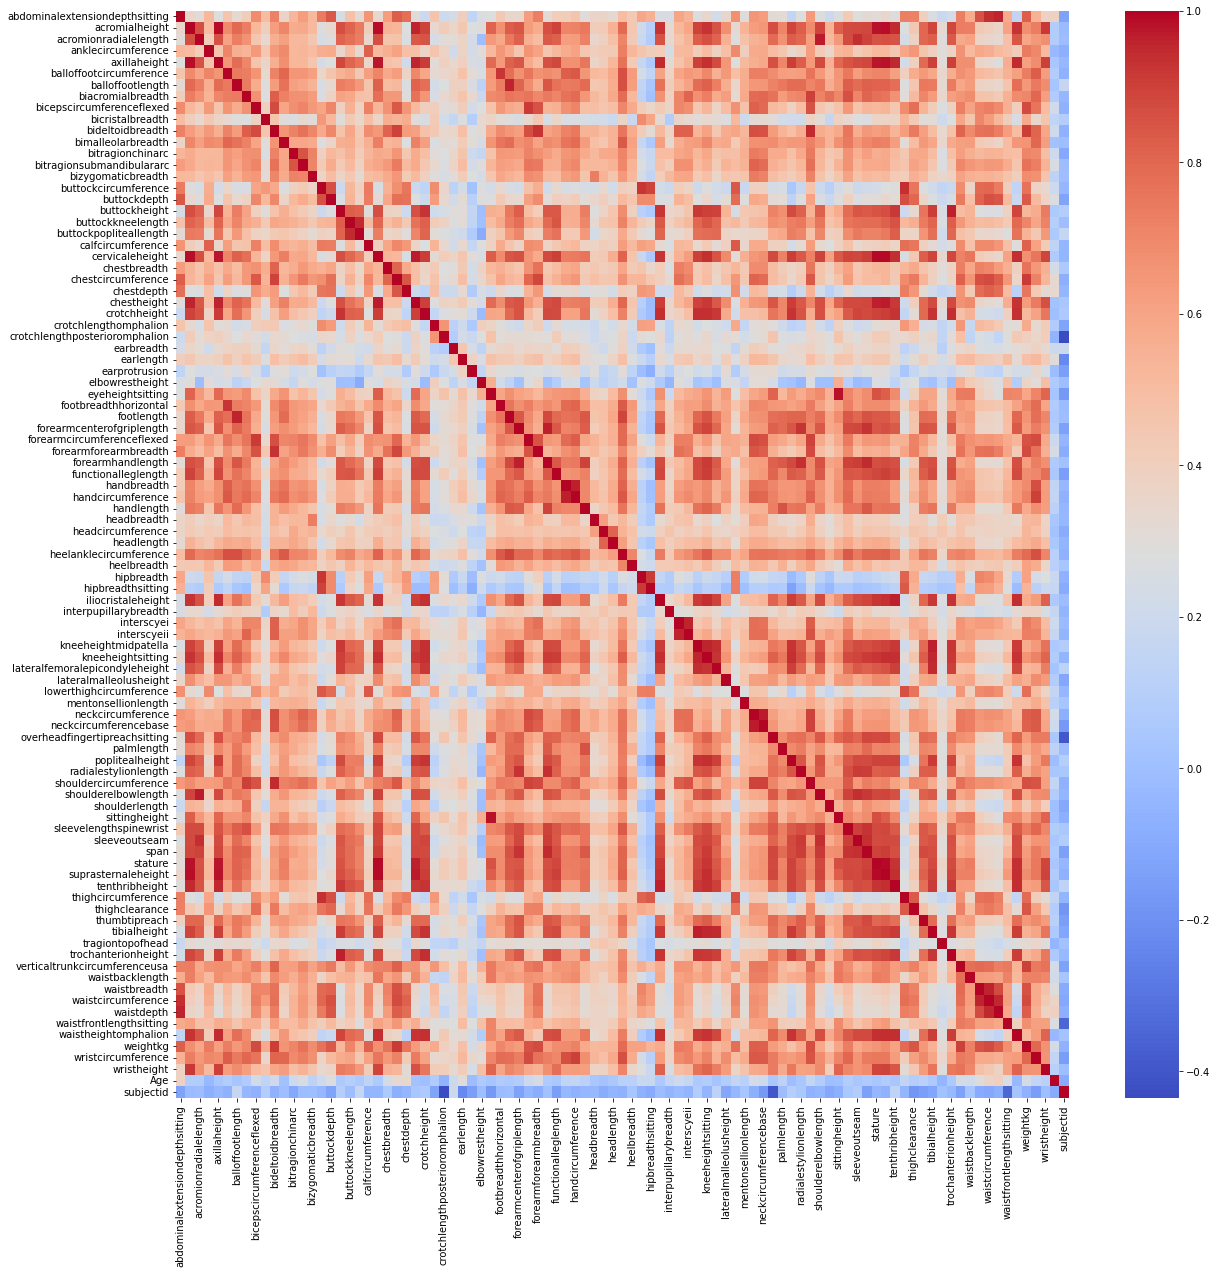

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap="coolwarm");

In [51]:
data.drop("subjectid", axis=1, inplace=True)

In [52]:
data.isnull().sum().any()

False

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [53]:
X = data.drop("DODRace", axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = data.DODRace

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [56]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 232)
Train target shape   :  (4615,)
Test features shape  :  (1154, 232)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score

In [58]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [59]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)

In [60]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[236  14   8]
 [  6 112  13]
 [ 15 104 646]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92       258
    Hispanic       0.49      0.85      0.62       131
       White       0.97      0.84      0.90       765

    accuracy                           0.86      1154
   macro avg       0.79      0.87      0.81      1154
weighted avg       0.90      0.86      0.87      1154


Train_Set
[[ 973   40   27]
 [  21  455   72]
 [  62  353 2612]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1040
    Hispanic       0.54      0.83      0.65       548
       White       0.96      0.86      0.91      3027

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



<b>Yukarıda da gözüktüğü üzere train değerleri ile test değerleri birbirine yakın gözüküyor. Black değerlerinin yüksek oluşu diğerlerine nazaran daha fazla ayırt edici özellik bulunduğunu göstermekte. Hispanic içinse fazla dengesizlik söz konusu yani ana odağımız bu değerleri iyileştirmek üzerene olacak.</b>

In [61]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [62]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.605
test_precision_Hispanic   0.497
test_recall_Hispanic      0.774
dtype: float64

### Logistic Model GridsearchCV

In [63]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [64]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [65]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,      # Hispanic turunun skorlarini artiracak en iyi parametreleri bul.
                              n_jobs=-1, cv=5)

In [66]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [67]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [68]:
log_model_grid.best_score_

0.770141784820684

<b>GridSearch işleminden çıkan best parametrelerin default değerler olduğunu görüyoruz. Yani default değerlerimiz en iyi sonucu veren değerlermiş. GridSearchden sonra tekrar CrossValidate yapmamıza gerek yok.</b>

In [69]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[236  14   8]
 [  6 112  13]
 [ 15 104 646]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92       258
    Hispanic       0.49      0.85      0.62       131
       White       0.97      0.84      0.90       765

    accuracy                           0.86      1154
   macro avg       0.79      0.87      0.81      1154
weighted avg       0.90      0.86      0.87      1154


Train_Set
[[ 973   40   27]
 [  21  455   72]
 [  62  353 2612]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1040
    Hispanic       0.54      0.83      0.65       548
       White       0.96      0.86      0.91      3027

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



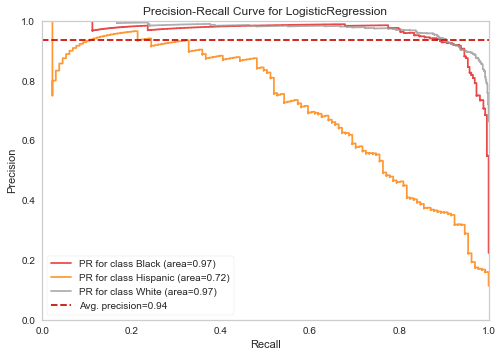

In [70]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],   # Tabloda isimler gorunsun diye bunu yazdik.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [71]:
viz.score_

{'Black': 0.9658439931465518,
 'Hispanic': 0.7159504550030943,
 'White': 0.9747781487175659,
 'micro': 0.9370390046921427}

In [72]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

### Lojistic Regression solver "liblenear" for small dataset

In [73]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    solver="liblinear", penalty="l1"))]
pipe_log_model_libl = Pipeline(steps=operations)

In [74]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[240   3  15]
 [  6  89  36]
 [ 12  43 710]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93       258
    Hispanic       0.66      0.68      0.67       131
       White       0.93      0.93      0.93       765

    accuracy                           0.90      1154
   macro avg       0.84      0.85      0.84      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 976   19   45]
 [  30  378  140]
 [  54  138 2835]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1040
    Hispanic       0.71      0.69      0.70       548
       White       0.94      0.94      0.94      3027

    accuracy                           0.91      4615
   macro avg       0.86      0.85      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [75]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.653
test_precision_Hispanic   0.665
test_recall_Hispanic      0.642
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [76]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [77]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[233  10  15]
 [  8 108  15]
 [ 12 118 635]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       258
    Hispanic       0.46      0.82      0.59       131
       White       0.95      0.83      0.89       765

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 958   41   41]
 [  19  452   77]
 [  56  389 2582]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1040
    Hispanic       0.51      0.82      0.63       548
       White       0.96      0.85      0.90      3027

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.87      4615



In [78]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.579
test_precision_Hispanic   0.473
test_recall_Hispanic      0.748
dtype: float64

###  SVC Model GridsearchCV

In [79]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]    
}

In [80]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]

In [81]:
model = Pipeline(steps=operations_svc)

In [82]:
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [83]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [84]:
svm_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 'scale'}

In [85]:
svm_model_grid.best_score_

0.7555462885738116

In [86]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[233  10  15]
 [  8 108  15]
 [ 12 118 635]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       258
    Hispanic       0.46      0.82      0.59       131
       White       0.95      0.83      0.89       765

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 958   41   41]
 [  19  452   77]
 [  56  389 2582]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1040
    Hispanic       0.51      0.82      0.63       548
       White       0.96      0.85      0.90      3027

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.87      4615



In [87]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]

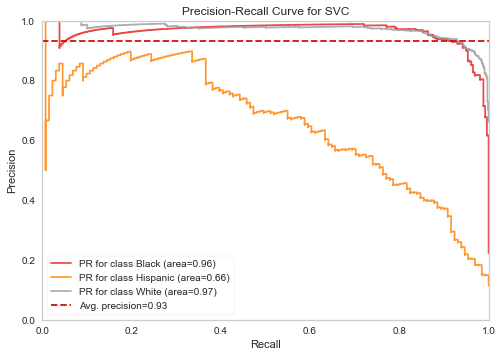

In [88]:
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [89]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [90]:
from sklearn.preprocessing import OrdinalEncoder

In [91]:
X2 = data.drop("DODRace",axis=1)
y = data.DODRace    

In [92]:
cat = X2.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [93]:
enc = OrdinalEncoder()

In [94]:
X2[cat] = enc.fit_transform(X2[cat])  
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,...,217,345,942,657,152,756,0.000,41.000,26,2.000
1,194,1379,320,207,1292,225,178,372,272,250,...,168,329,1032,534,155,815,0.000,18.000,21,2.000
2,183,1369,329,233,1271,237,196,397,300,276,...,159,367,1035,663,162,799,0.000,119.000,23,2.000
3,261,1356,306,214,1250,240,188,384,364,276,...,235,371,999,782,173,818,0.000,30.000,22,2.000
4,309,1303,308,214,1210,217,182,378,320,336,...,300,380,911,886,152,762,0.000,119.000,45,2.000


In [95]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [96]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [97]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [98]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [99]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[182   1  77]
 [  7   7 122]
 [  8   2 748]]
              precision    recall  f1-score   support

       Black       0.92      0.70      0.80       260
    Hispanic       0.70      0.05      0.10       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.80      0.58      0.59      1154
weighted avg       0.81      0.81      0.77      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



<b> Balance yapmamıza rağmen Hispanic verileri kötü çıktı. Ayrıca trainde overfitting durumu söz konusu. Sonraki adımlarda hyperparametreler ile oynayarak skorları iyileştirmeye çalışacağız </b>

In [100]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.081
test_precision_Hispanic   0.567
test_recall_Hispanic      0.044
dtype: float64

### RF Model GridsearchCV

In [101]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[10,12,14,16]}

In [102]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [103]:

rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [104]:
rf_grid_model.best_params_

{'max_depth': 10, 'n_estimators': 400}

In [105]:
rf_grid_model.best_score_

0.20258239891267413

In [106]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[201   4  55]
 [ 13  44  79]
 [ 18  29 711]]
              precision    recall  f1-score   support

       Black       0.87      0.77      0.82       260
    Hispanic       0.57      0.32      0.41       136
       White       0.84      0.94      0.89       758

    accuracy                           0.83      1154
   macro avg       0.76      0.68      0.71      1154
weighted avg       0.82      0.83      0.82      1154


Train_Set
[[1022    0   16]
 [   0  533   10]
 [   7   19 3008]]
              precision    recall  f1-score   support

       Black       0.99      0.98      0.99      1038
    Hispanic       0.97      0.98      0.97       543
       White       0.99      0.99      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.98      0.99      0.98      4615
weighted avg       0.99      0.99      0.99      4615



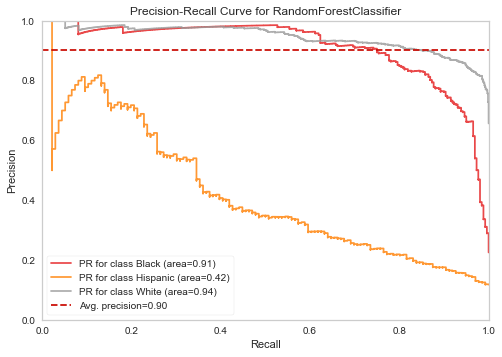

In [107]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [108]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [109]:
!pip install xgboost==0.90

In [110]:
import xgboost as xgb

xgb.__version__

'0.90'

In [111]:
from xgboost import XGBClassifier

In [112]:
xgb_model = XGBClassifier(random_state=101)

In [113]:
from sklearn.utils import class_weight

In [114]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [115]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)

XGBClassifier(objective='multi:softprob', random_state=101)

In [116]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[232  17  11]
 [ 11  93  32]
 [ 25 110 623]]
              precision    recall  f1-score   support

       Black       0.87      0.89      0.88       260
    Hispanic       0.42      0.68      0.52       136
       White       0.94      0.82      0.88       758

    accuracy                           0.82      1154
   macro avg       0.74      0.80      0.76      1154
weighted avg       0.86      0.82      0.83      1154


Train_Set
[[ 979   21   38]
 [  17  464   62]
 [  97  315 2622]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1038
    Hispanic       0.58      0.85      0.69       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.90      0.88      0.89      4615



In [117]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.504
test_precision_Hispanic   0.426
test_recall_Hispanic      0.621
dtype: float64

### XGBoost Model GridsearchCV

In [118]:
comp = pd.DataFrame(classes_weights)

In [119]:
comp["label"]= y_train2.reset_index(drop=True)

In [120]:
comp.groupby("label")[0].value_counts()

label     0    
Black     1.482    1038
Hispanic  2.833     543
White     0.507    3034
Name: 0, dtype: int64

In [121]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}  

In [122]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [123]:
xgb_grid_model.best_params_ 

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [124]:
xgb_grid_model.best_score_

0.6242439687393816

In [125]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[233  18   9]
 [ 10  95  31]
 [ 26 119 613]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.88       260
    Hispanic       0.41      0.70      0.52       136
       White       0.94      0.81      0.87       758

    accuracy                           0.82      1154
   macro avg       0.74      0.80      0.76      1154
weighted avg       0.86      0.82      0.83      1154


Train_Set
[[ 979   19   40]
 [  16  463   64]
 [  94  328 2612]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1038
    Hispanic       0.57      0.85      0.68       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.90      0.88      0.88      4615



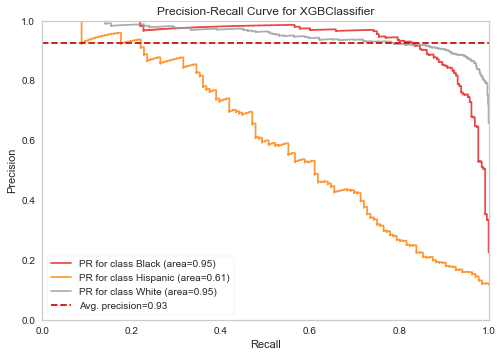

In [126]:
model = XGBClassifier(random_state=101, colsample_bytree=0.5, subsample=0.5)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [127]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

### Comparing Models

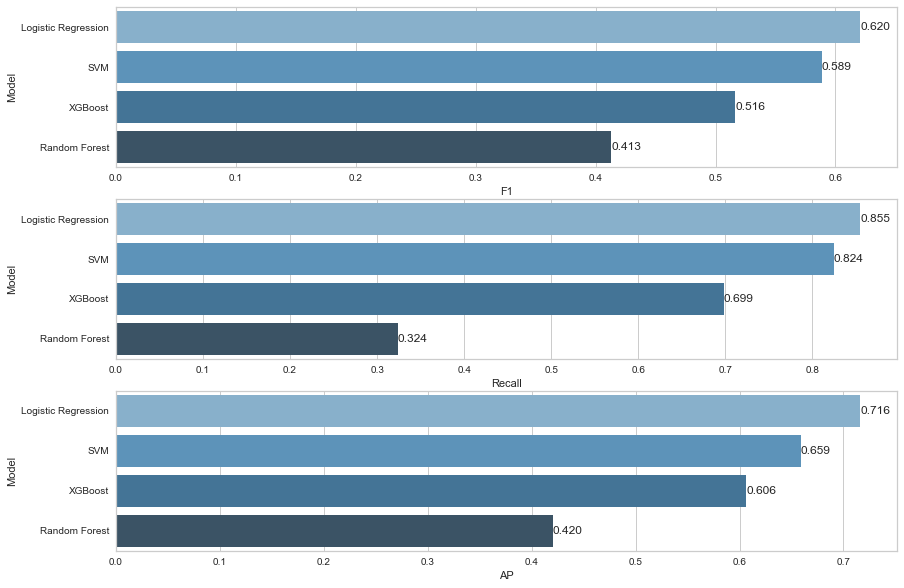

In [128]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})    # Dengesiz datasetlerinde modelin genel performansi.

def labels(ax):   # Sayilari yazdirmak icin.
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")        # f1 score
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")   # recall score
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")       # average precision score
labels(ax)
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [129]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations)

In [130]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [131]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,SubjectsBirthLocation_Venezuela,SubjectsBirthLocation_Vermont,SubjectsBirthLocation_Virginia,SubjectsBirthLocation_Washington,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,SubjectsBirthLocation_Wyoming,SubjectsBirthLocation_Zambia,WritingPreference_Left hand,WritingPreference_Right hand
count,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,...,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000
mean,247.254,1408.630,328.072,225.202,1301.903,244.408,195.119,399.706,341.663,274.903,...,0.000,0.002,0.020,0.011,0.005,0.017,0.001,0.000,0.108,0.882
std,37.458,78.303,20.445,15.966,71.261,16.804,13.379,30.124,41.271,19.240,...,0.013,0.047,0.139,0.102,0.067,0.130,0.035,0.013,0.310,0.323
min,155.000,1146.000,249.000,156.000,1062.000,186.000,151.000,283.000,216.000,197.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,220.000,1353.000,314.000,214.000,1252.000,233.000,186.000,377.000,312.000,262.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,243.000,1412.000,328.000,225.000,1304.000,245.000,196.000,404.000,342.000,274.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,272.000,1464.000,342.000,235.000,1351.000,256.000,205.000,422.000,370.000,288.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
max,451.000,1683.000,393.000,293.000,1553.000,306.000,245.000,489.000,490.000,362.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [132]:
mean_human = X.describe().loc["mean"]
mean_human

abdominalextensiondepthsitting     247.254
acromialheight                    1408.630
acromionradialelength              328.072
anklecircumference                 225.202
axillaheight                      1301.903
                                    ...   
SubjectsBirthLocation_Wisconsin      0.017
SubjectsBirthLocation_Wyoming        0.001
SubjectsBirthLocation_Zambia         0.000
WritingPreference_Left hand          0.108
WritingPreference_Right hand         0.882
Name: mean, Length: 232, dtype: float64

In [133]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

In [134]:
y[201]

'Hispanic'

<b> 201.satırdaki gözlemi modelin tahmin etmesini istedik ve Hispanic olarak tahmin etti. Sonrasında 201.satırdaki gözlemin gerçek değerine baktığımızda, o da Hispanic çıktı. Yani modelimiz doğru tahmin yaptı. </b>

In [135]:
final_model.predict([mean_human])

array(['White'], dtype=object)

---
---

In [136]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7900286711873047

In [137]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7782922507470609

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [138]:
!pip install imblearn

In [139]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [144]:
over = SMOTE()
under = RandomUnderSampler() 

In [145]:
over = SMOTE(sampling_strategy={"Hispanic": 1200})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [146]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [147]:
y_resampled_over.value_counts()

White       3027
Hispanic    1200
Black       1040
Name: DODRace, dtype: int64

In [148]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [149]:
y_resampled_under.value_counts()

White       2500
Black       1040
Hispanic     548
Name: DODRace, dtype: int64

In [150]:
steps = [('o', over), ('u', under)]

pipeline = imbpipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [151]:
y_resampled.value_counts()

White       2500
Hispanic    1200
Black       1040
Name: DODRace, dtype: int64

In [152]:
y_train.value_counts()

White       3027
Black       1040
Hispanic     548
Name: DODRace, dtype: int64

## Logistic Regression Over/Under Sampling

In [153]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [154]:
smote_pipeline = imbpipeline(steps=operations)

In [155]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [156]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[240  10   8]
 [  9 100  22]
 [ 15  85 665]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       258
    Hispanic       0.51      0.76      0.61       131
       White       0.96      0.87      0.91       765

    accuracy                           0.87      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.90      0.87      0.88      1154


Train_Set
[[ 979   28   33]
 [  32  404  112]
 [  67  261 2699]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92      1040
    Hispanic       0.58      0.74      0.65       548
       White       0.95      0.89      0.92      3027

    accuracy                           0.88      4615
   macro avg       0.81      0.86      0.83      4615
weighted avg       0.90      0.88      0.89      4615



In [157]:
model = smote_pipeline = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.615
test_precision_Hispanic   0.548
test_recall_Hispanic      0.703
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [159]:
!pip install shap

  Using cached shap-0.41.0-cp39-cp39-win_amd64.whl (435 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


In [161]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [163]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[239  11   8]
 [  5 111  15]
 [ 15 105 645]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92       258
    Hispanic       0.49      0.85      0.62       131
       White       0.97      0.84      0.90       765

    accuracy                           0.86      1154
   macro avg       0.79      0.87      0.81      1154
weighted avg       0.90      0.86      0.87      1154


Train_Set
[[ 973   41   26]
 [  21  453   74]
 [  69  349 2609]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1040
    Hispanic       0.54      0.83      0.65       548
       White       0.96      0.86      0.91      3027

    accuracy                           0.87      4615
   macro avg       0.81      0.87      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [169]:
pip install numba --upgrade

  Using cached numba-0.56.2-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached llvmlite-0.39.1-cp39-cp39-win_amd64.whl (23.2 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [172]:
pip install numba==0.53

  Using cached numba-0.53.0-cp39-cp39-win_amd64.whl (2.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [180]:
pip install librosa --ignore-installed llvmlite

  Using cached librosa-0.9.2-py3-none-any.whl (214 kB)
  Using cached llvmlite-0.39.1-cp39-cp39-win_amd64.whl (23.2 MB)
  Using cached numpy-1.23.2-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached numba-0.56.2-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-win_amd64.whl (689 kB)
  Using cached scipy-1.9.1-cp39-cp39-win_amd64.whl (38.6 MB)
  Using cached audioread-3.0.0-py3-none-any.whl
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached decorator-5.1.1-py3-none-any.whl (9.1 kB)
  Using cached pooch-1.6.0-py3-none-any.whl (56 kB)
  Using cached scikit_learn-1.1.2-cp39-cp39-win_amd64.whl (7.4 MB)
  Using cached resampy-0.4.0-py3-none-any.whl (3.1 MB)
  Using cached setuptools-59.8.0-py3-none-any.whl (952 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using c

ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'C:\\Users\\berkay.akin\\Anaconda3\\Lib\\site-packages\\llvmlite\\binding\\llvmlite.dll'
Consider using the `--user` option or check the permissions.



In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___